# Lab 1 Survey Data and CLRM

# Survey Data Analysis


## Question 1: Explanation of Concepts

In [5]:
!pip install factor_analyzer


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

df = pd.read_stata("Chapter_4_OC_Y2009.dta")

# select relevant ownership concentration variables
features = ['HI', 'LO', 'First_Second', 'sum_five', 'bzd5l', 'bzd5_l', 'ssd5_l', 'ssd5_o']
df_clean = df[features].dropna()

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

## Question 2

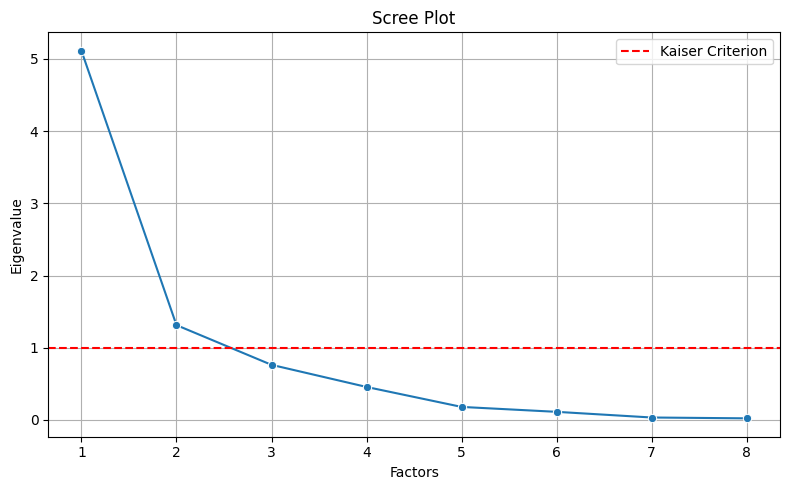

Factor 1: Eigenvalue = 5.115
Factor 2: Eigenvalue = 1.314
Factor 3: Eigenvalue = 0.764
Factor 4: Eigenvalue = 0.457
Factor 5: Eigenvalue = 0.181
Factor 6: Eigenvalue = 0.113
Factor 7: Eigenvalue = 0.034
Factor 8: Eigenvalue = 0.023


In [8]:
# PCA with Eigenvalues, Variance, Scree Plot

# Perform factor analysis with PCA extraction, no rotation
fa = FactorAnalyzer(n_factors=len(features), rotation=None, method='principal')
fa.fit(X_scaled)

# Get eigenvalues and plot scree plot
ev, v = fa.get_eigenvalues()

# Scree Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, len(ev)+1), y=ev, marker="o")
plt.axhline(y=1, color='r', linestyle='--', label="Kaiser Criterion")
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print eigenvalues
for i, val in enumerate(ev, 1):
    print(f"Factor {i}: Eigenvalue = {val:.3f}")

## Question 3

In [9]:
# loadings (Unrotated, Varimax, Promax)

# Choose number of components where eigenvalue > 1
n_factors = sum(ev > 1)

# PCA loadings (unrotated)
fa_unrotated = FactorAnalyzer(n_factors=n_factors, rotation=None, method='principal')
fa_unrotated.fit(X_scaled)
loadings_unrotated = pd.DataFrame(fa_unrotated.loadings_, index=features, columns=[f"PC{i+1}" for i in range(n_factors)])
print("\nUnrotated Loadings:\n", loadings_unrotated)

# Varimax rotation
fa_varimax = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='principal')
fa_varimax.fit(X_scaled)
loadings_varimax = pd.DataFrame(fa_varimax.loadings_, index=features, columns=[f"Varimax_PC{i+1}" for i in range(n_factors)])
print("\nVarimax Rotated Loadings:\n", loadings_varimax)

# Promax rotation
fa_promax = FactorAnalyzer(n_factors=n_factors, rotation='promax', method='principal')
fa_promax.fit(X_scaled)
loadings_promax = pd.DataFrame(fa_promax.loadings_, index=features, columns=[f"Promax_PC{i+1}" for i in range(n_factors)])
print("\nPromax Rotated Loadings:\n", loadings_promax)


Unrotated Loadings:
                    PC1       PC2
HI            0.828195 -0.339827
LO            0.971104 -0.018958
First_Second  0.605616 -0.037972
sum_five      0.750733 -0.507418
bzd5l         0.755098  0.552517
bzd5_l        0.558535  0.752143
ssd5_l        0.948608  0.087171
ssd5_o       -0.879410  0.245856

Varimax Rotated Loadings:
               Varimax_PC1  Varimax_PC2
HI               0.879611     0.166354
LO               0.824593     0.513274
First_Second     0.528495     0.298170
sum_five         0.905983    -0.016380
bzd5l            0.332068     0.874745
bzd5_l           0.058472     0.935020
ssd5_l           0.747899     0.590003
ssd5_o          -0.871348    -0.273056

Promax Rotated Loadings:
               Promax_PC1  Promax_PC2
HI              0.949243   -0.108579
LO              0.771591    0.305361
First_Second    0.504719    0.160622
sum_five        1.039841   -0.325731
bzd5l           0.089592    0.884169
bzd5_l         -0.242742    1.045579
ssd5_l          

## Question 4

In [10]:
# Predict PC scores, KMO, Correlation

# Factor scores from varimax solution
factor_scores = pd.DataFrame(fa_varimax.transform(X_scaled), columns=[f"PC{i+1}" for i in range(n_factors)])

# Summary statistics
print("\nDescriptive Statistics of Predicted Component Scores:\n", factor_scores.describe())

# Correlation between PC1 and PC2
print("\nCorrelation Matrix of Principal Components:\n", factor_scores.corr())

# KMO Measure
kmo_all, kmo_model = calculate_kmo(df_clean)
print(f"\nKMO Measure of Sampling Adequacy: {kmo_model:.3f}")


Descriptive Statistics of Predicted Component Scores:
                 PC1           PC2
count  2.340000e+02  2.340000e+02
mean   1.214603e-16 -1.062778e-16
std    1.002144e+00  1.002144e+00
min   -1.817327e+00 -2.395867e+00
25%   -6.949135e-01 -1.069446e+00
50%   -1.278384e-01  4.311912e-01
75%    6.499812e-01  7.918674e-01
max    3.131884e+00  1.364095e+00

Correlation Matrix of Principal Components:
               PC1           PC2
PC1  1.000000e+00  4.161695e-16
PC2  4.161695e-16  1.000000e+00

KMO Measure of Sampling Adequacy: 0.755


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
